# Preword

In this notebook, i try to apply what i learnt for a few months. I'm new, that's why you can find mistakes or wrong usages. Please feel to free to say things that i'm doing wrong. I just want to practice and improve my skills.

### Beginner friendly notebook

# What will you find here

* Exploring & Visualising the data
* Transform the data for building better models
* Comparing the results and easily to choose the best model
* Trying Dimension Reduction, Scaling
* & more...

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/BankChurners.csv


In [2]:
# Importing neccesary packages

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot') # default plot style.

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math
import warnings
warnings.filterwarnings('ignore')

# What do we have?, let's see

So.. we have only one dataset which in total 10127 observations 21 features. Our target column is Attrition_Flag(binary) and we will try to predict it. Dataset is not include any missing values(NaN/Null/NotANumber), it's a good new. We see that the dataset consists mostly of numerical data.

In [3]:
full_df = pd.read_csv('./data/BankChurners.csv')

display(full_df.shape)
# display 5 sample randomly
full_df.sample(5)

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1316,711595833,Existing Customer,46,M,3,College,Married,$60K - $80K,Blue,36,...,9981.0,807,9174.0,0.655,1456,30,0.667,0.081,0.000115,0.99989
8015,721020858,Existing Customer,34,F,1,College,Single,Unknown,Blue,20,...,3190.0,1959,1231.0,0.622,4220,66,0.610,0.614,0.000104,0.99990
5580,807369708,Existing Customer,52,M,3,College,Married,$120K +,Blue,47,...,6355.0,0,6355.0,0.711,4009,74,0.947,0.000,0.000329,0.99967
7621,827712108,Existing Customer,42,F,5,Graduate,Married,Less than $40K,Blue,38,...,2346.0,1373,973.0,0.730,4432,72,0.756,0.585,0.000057,0.99994
4032,720755658,Existing Customer,42,F,2,Doctorate,Married,Less than $40K,Blue,32,...,1592.0,0,1592.0,0.745,4172,70,0.750,0.000,0.000076,0.99992


In [4]:
# We don't need the unique ids'
full_df.drop('CLIENTNUM', axis=1, inplace=True)

full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)
full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

display(full_df.shape)

(10127, 20)

In [5]:
# Checking features and target columns
display(full_df.columns)
# Checking dtypes
display(full_df.info())
# Checking numeric values stats
display(full_df.describe())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Exploring the Data

## Categorical Features

* **Attrition_Flag** (1: Existing Customer, 0: Attrited Customer): The Customer leave or not
* **Gender** (1: Male, 0: Female)
* **Education_Level** (Graduate , High School, Unknown, Uneducated, College, Post-Graduate, Doctorate)
* **Marital_Status** (Married, Single, Unknown, Divorced)
* **Income_Category** (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +) in dollar
* **Card_Category** (Blue, Silver, Gold, Platinum)

In [6]:
cats = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplot(cats):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=full_df, ax=axis[i][j])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(full_df)*100),
                        ha="center") 
            index += 1

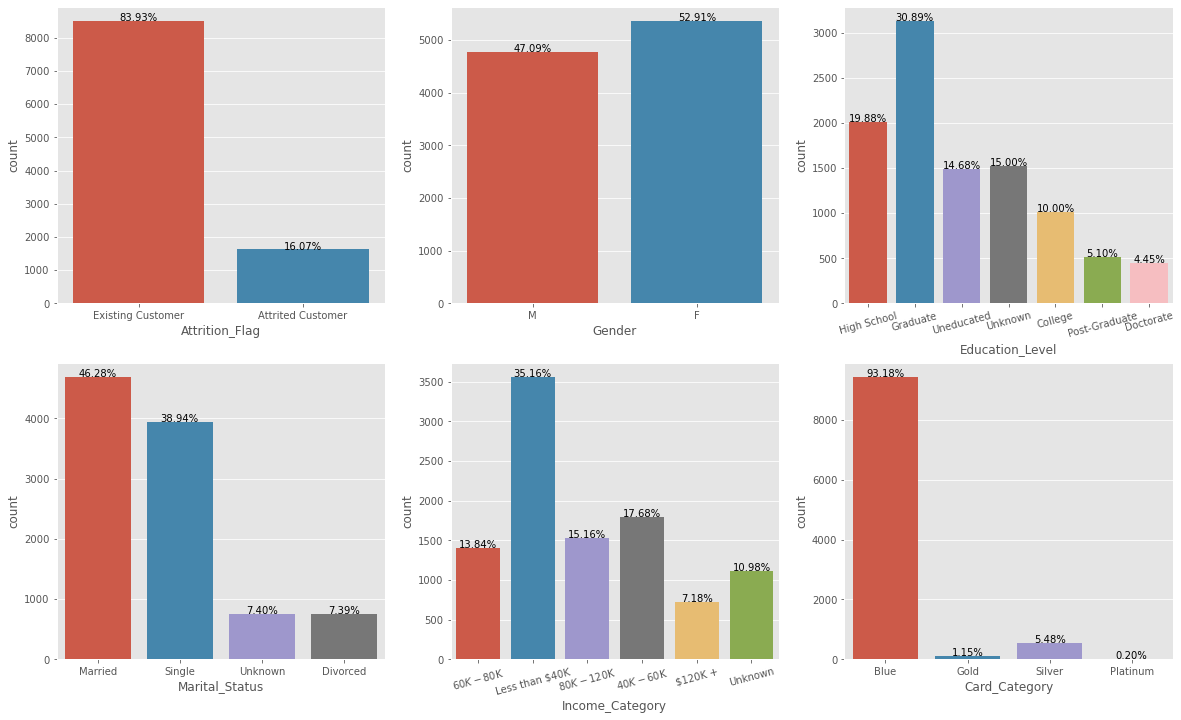

In [7]:
pltCountplot(cats)

### Observations

* We can see that the dataset is not equally distribute according to Attrition_Flag. We have samples which are mostly Existing.
* We can say that if education level is improved, using the credit card is decresing.
* Generally people use blue card, it's must be correlated with income.

In [8]:
def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=full_df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(full_df)*100),
                        ha="center") 
            index += 1

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


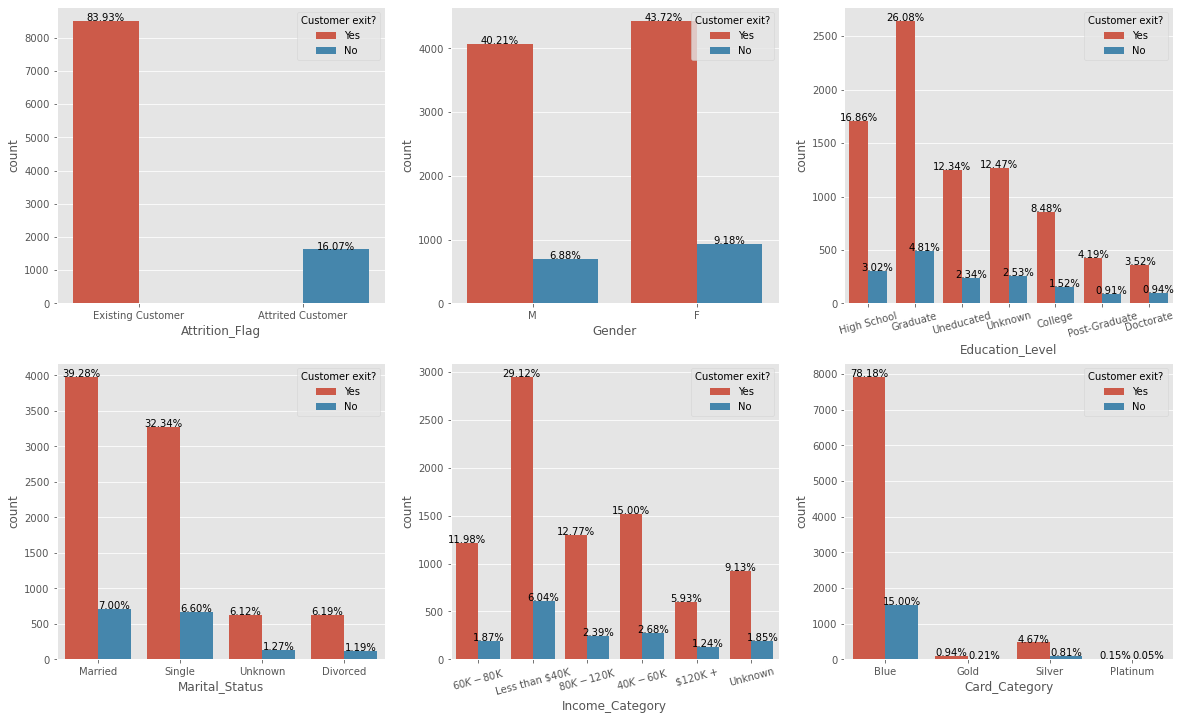

In [9]:
pltCountplotHueTarget(cats, 'Attrition_Flag')

## Numerical Features

* **Customer_Age**: Customer's Age in Years
* **Dependent_count:** Number of dependents
* **Months_on_book:** Period of relationship with bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio

In [10]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3, 3,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(full_df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

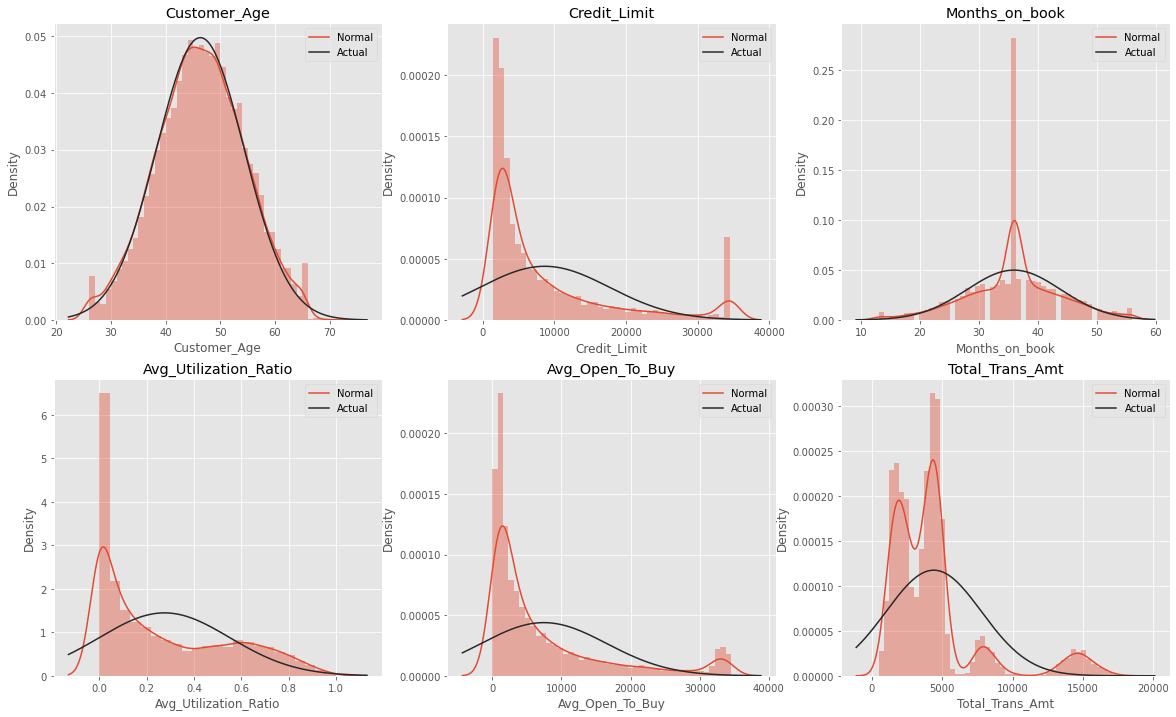

In [11]:
plotDistPlot(some_columns)

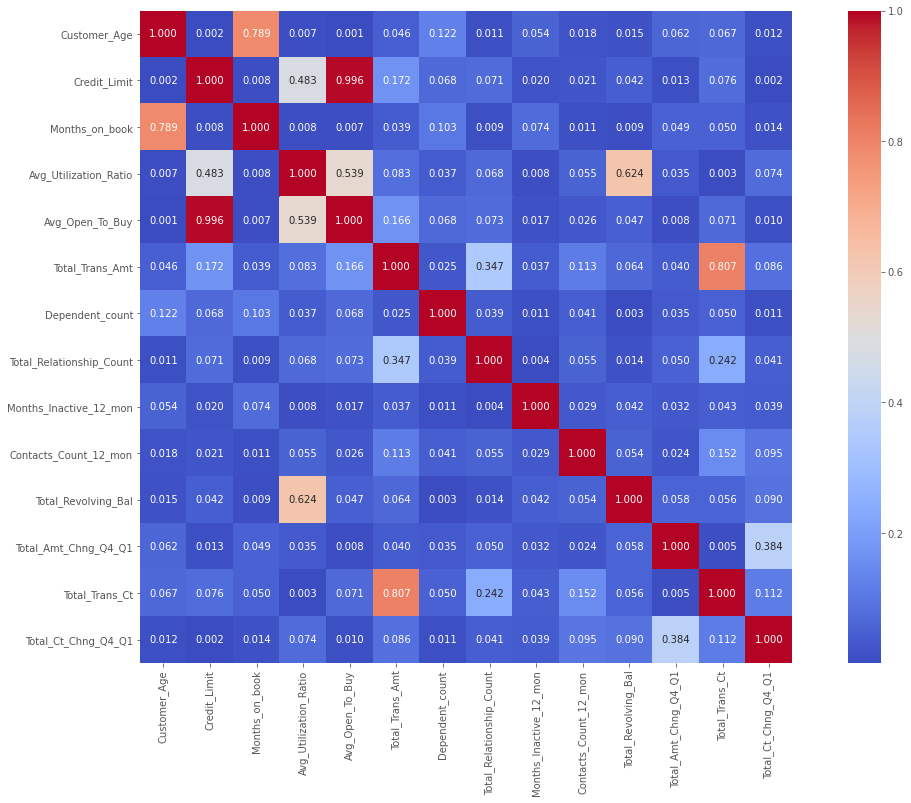

In [12]:
corr_data = full_df.loc[:, numeric_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

### NOTICE:  
Generally features have not strong correlation with each other. This is not mean they are not correleted. In corr matrix, we can see linearly corelated features. Maybe our features are correlated quadratic or n-degree polynomial. We can't see if features are correlated n-degree polynomial in the corr matrix.

## Missing Values

In the beginning of the notebook, i indicated that the dataset has not include missing values (If you check dataset page in kaggle, you see it). But we should check the dataset again, We should ensure. Heatmap is all dark. It's mean there is no missing data.

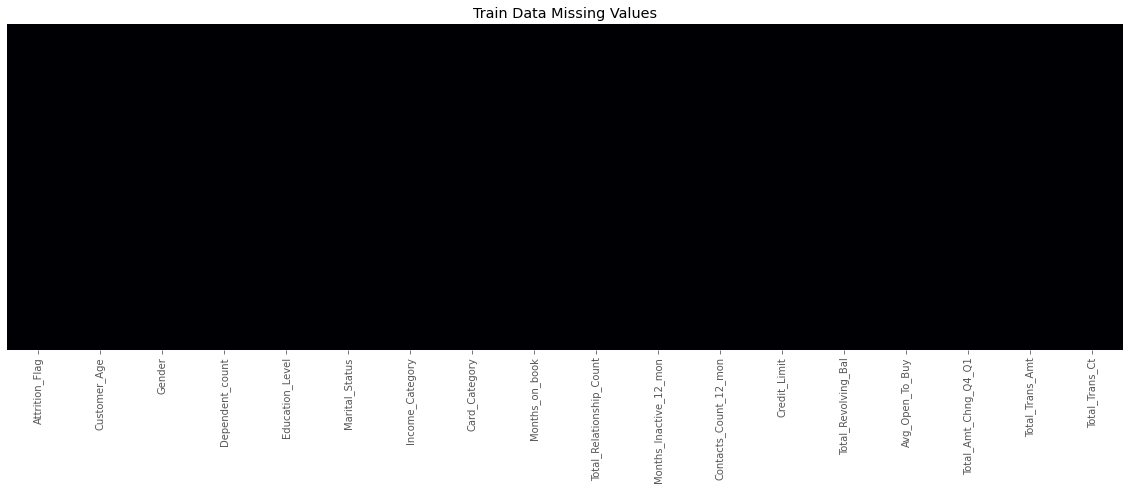

In [13]:
# detecting the missing data

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Train Data Missing Values')
plt.xticks(rotation=90)

sns.heatmap(full_df.iloc[:,:-2].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax)

plt.show()

In [18]:
x = full_df['Education_Level'].replace({'Unknown': 1, 'High School':0, 'Graduate':0, 'Uneducated':0,
                                                         'College':0,'Post-Graduate':0,'Doctorate':0})

In [25]:
print(x.sum() / x.shape[0])


0.14999506270366347


In [26]:
x = full_df['Income_Category'].replace({'Unknown': 1 , 'Less than $40K':0, '$40K - $60K':0, 
                                                      '$80K - $120K':0, '$60K - $80K':0, '$120K +':0})
print(x.sum() / x.shape[0])

0.10980547052434086


## Time to Feature Engineering!!

We will play with the data.

## Object, Category to Numeric, Encode

ML algorithms works on numeric values. That's why we should transform Object, Category, etc. values to numeric values.

### Binary Flags

In [14]:
updated_df = pd.DataFrame()

def tobinary():
    
    # full_df['Attrition_Flag'] = full_df.Attrition_Flag // same thing
    updated_df['Attrition'] = full_df.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
    
    updated_df['Gender'] = full_df.Gender.map({'M':1, 'F':0})

### String to integer

In [15]:
def stringtoint():
    missing_income = full_df['Income_Category'].replace({'Unknown': 1 , 'Less than $40K':0, '$40K - $60K':0, 
                                                      '$80K - $120K':0, '$60K - $80K':0, '$120K +':0})
    #missinng data will be replaced with mode:
    income_data    = full_df['Income_Category'].replace({'Unknown': 1 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
    
    
    
    missing_education = full_df['Education_Level'].replace({'Unknown': 1, 'High School':0, 'Graduate':0, 'Uneducated':0,
                                                         'College':0,'Post-Graduate':0,'Doctorate':0})
    #missinng data will be replaced with mode:
    education_data    = full_df['Education_Level'].replace({'Unknown': 2, 'High School':1, 'Graduate':2, 'Uneducated':3,
                                                         'College':4,'Post-Graduate':5,'Doctorate':6})
    
    updated_df['Missing_Income']    = missing_income
    updated_df['Income_Category']   = income_data
    updated_df['Missing_Education'] = missing_education
    updated_df['Education_Level']   = education_data

### Dummies

In [16]:
def encode():
    global updated_df
    card_dummies = pd.get_dummies(full_df['Card_Category'], prefix='Card')
    marital_dummies = pd.get_dummies(full_df['Marital_Status'], prefix='Marital')
    updated_df = pd.concat([updated_df, marital_dummies, card_dummies], axis=1)

In [17]:
def concat_with_numerics():
    global updated_df
    updated_df = pd.concat([updated_df, full_df.loc[:, numeric_columns]], axis=1)

In [18]:
tobinary()
stringtoint()
encode()
concat_with_numerics()

In [19]:
print('Data shapes """including target value"""')
print(f'Old shape : {full_df.shape}')
print(f'Updated shape : {updated_df.shape}')

Data shapes """including target value"""
Old shape : (10127, 20)
Updated shape : (10127, 28)


## Look updated data

We're going to make sure the data is ready for modeling. Let's see the updated data with big picture.

In [20]:
updated_df.sample(5)

,Attrition,Gender,Missing_Income,Income_Category,Missing_Education,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
9851,1,1,0,5,0,2,0,1,0,0,...,34516.0,15560,4,4,2,3,0,0.849,100,0.724
9579,1,1,0,5,0,2,0,1,0,0,...,33654.0,15034,3,2,1,3,862,0.815,111,0.762
1188,1,1,1,1,0,2,0,0,1,0,...,17009.0,2979,1,6,3,4,1880,0.702,55,0.774
6767,1,0,0,1,1,2,0,0,1,0,...,1054.0,4041,0,6,3,3,1528,0.771,67,0.457
2027,1,1,0,3,0,2,0,1,0,0,...,1542.0,2631,3,4,3,2,1256,1.132,55,0.774


In [21]:
updated_df.describe()

,Attrition,Gender,Missing_Income,Income_Category,Missing_Education,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,...,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,0.109805,2.182384,0.149995,2.479115,0.073862,0.462822,0.389355,0.073961,...,7469.139637,4404.086304,2.346203,3.812580,2.341167,2.455317,1162.814061,0.759941,64.858695,0.712222
std,0.367235,0.499178,0.312663,1.334087,0.357084,1.299027,0.261559,0.498641,0.487628,0.261720,...,9090.685324,3397.129254,1.298908,1.554408,1.010622,1.106225,814.987335,0.219207,23.472570,0.238086
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,510.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,1324.500000,2155.500000,1.000000,3.000000,2.000000,2.000000,359.000000,0.631000,45.000000,0.582000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,3474.000000,3899.000000,2.000000,4.000000,2.000000,2.000000,1276.000000,0.736000,67.000000,0.702000
75%,1.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,1.000000,0.000000,...,9859.000000,4741.000000,3.000000,5.000000,3.000000,3.000000,1784.000000,0.859000,81.000000,0.818000
max,1.000000,1.000000,1.000000,5.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,34516.000000,18484.000000,5.000000,6.000000,6.000000,6.000000,2517.000000,3.397000,139.000000,3.714000


In [22]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Missing_Income            10127 non-null  int64  
 3   Income_Category           10127 non-null  int64  
 4   Missing_Education         10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Divorced          10127 non-null  uint8  
 7   Marital_Married           10127 non-null  uint8  
 8   Marital_Single            10127 non-null  uint8  
 9   Marital_Unknown           10127 non-null  uint8  
 10  Card_Blue                 10127 non-null  uint8  
 11  Card_Gold                 10127 non-null  uint8  
 12  Card_Platinum             10127 non-null  uint8  
 13  Card_Silver               10127 non-null  uint8  
 14  Custom

# Modelling

In [23]:
!pip install lightgbm

In [24]:
# Importing packages for modelling.

import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [25]:
def estimates(X_data, y_data, models, cv):
    
    train_acc_dict = dict()
    test_acc_dict = dict()
    time_dict = dict()
    
    for model in models:
        
        current_model_name = model.__class__.__name__
        
        cv_results = cross_validate(model, X_data, y_data, cv=cv,
                                    return_train_score=True, scoring='accuracy')
        
        train_acc_dict[current_model_name] = cv_results['train_score'].mean()
        test_acc_dict[current_model_name] = cv_results['test_score'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_acc_dict, test_acc_dict, time_dict

In [26]:
m_logreg = LogisticRegression()

m_gbc = GradientBoostingClassifier(random_state=14)

m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=4, random_state=14)

m_lgb = lgb.LGBMClassifier(num_iterations=550, learning_rate=0.01055,
                        max_depth=3, random_state=14)

m_xgb = xgb.XGBClassifier(n_estimators=2250,
                       max_depth=2, random_state=14)

m_gnb = GaussianNB()

m_mlpc = MLPClassifier(random_state=14)

m_svc = SVC(probability=True)

In [27]:
cv = StratifiedKFold(11, shuffle=True, random_state=14)

models = [m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_gnb, m_mlpc, m_svc]

X = updated_df.drop('Attrition', axis=1)
y = updated_df['Attrition']

print(X.shape)
print(y.shape)

train_acc_dict, test_acc_dict, time_dict = estimates(X, y, models, cv)

(10127, 27)
(10127,)
[23:11:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

# Model results

In [28]:
# Training accuracy
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 87.9%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 90.9%
LGBMClassifier - 96.4%
XGBClassifier - 100.0%
GaussianNB - 89.7%
MLPClassifier - 78.2%
SVC - 83.9%


In [29]:
# Test accuracy
for key, value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 87.9%
GradientBoostingClassifier - 96.6%
RandomForestClassifier - 90.6%
LGBMClassifier - 95.7%
XGBClassifier - 97.1%
GaussianNB - 89.6%
MLPClassifier - 77.6%
SVC - 83.9%


In [30]:
def result_barplots(result_1, result_2, ylabel_1 = 'Score', ylabel_2 = 'Score'):
    
    current_df_1 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_1:list(result_1.values())})
    current_df_2 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_2:list(result_1.values())})
    
    current_df_1 = current_df_1.sort_values(by=ylabel_1, ascending=False)
    current_df_2 = current_df_2.sort_values(by=ylabel_2, ascending=False)
    
    fig, ax = plt.subplots(1,2,figsize=(18,9), constrained_layout=True)
    
    for i in range(2):
        for item in ax[i].get_xticklabels():
            item.set_rotation(45)
    
    sns.barplot('Model',ylabel_1,data=current_df_1,ax=ax[0])
    sns.barplot('Model',ylabel_2,data=current_df_2,ax=ax[1])

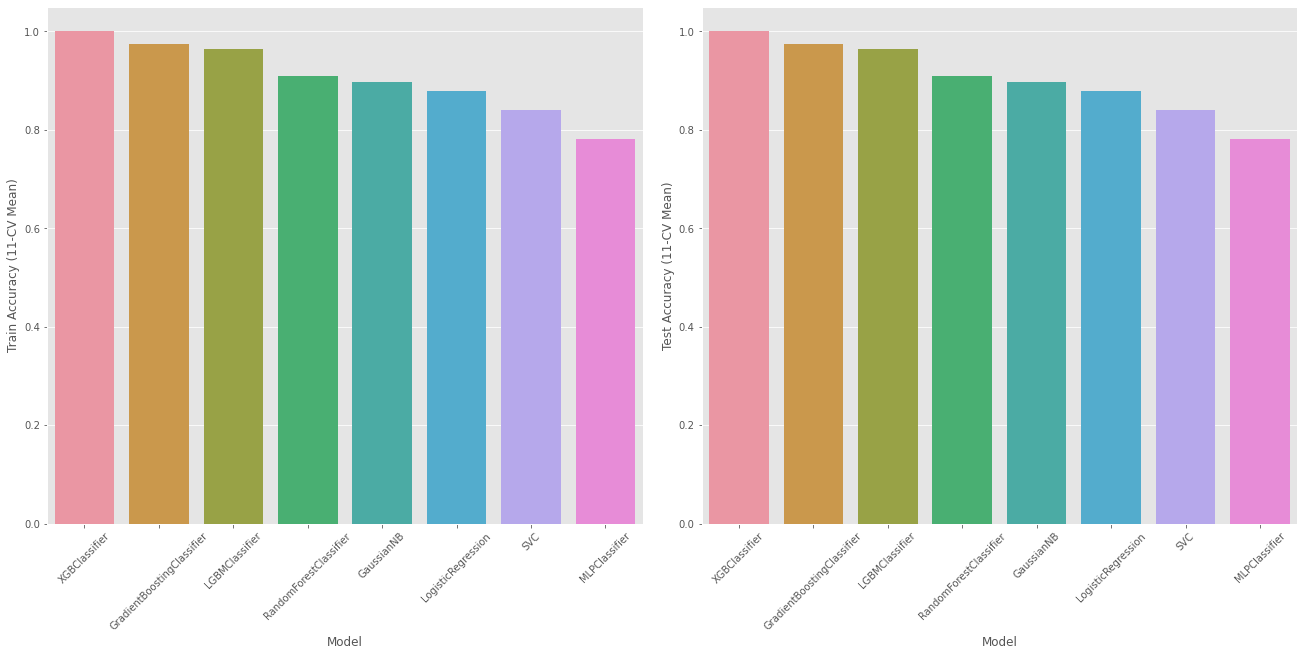

In [31]:
result_barplots(train_acc_dict, test_acc_dict, 'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

In [32]:
def result_line(result, title = 'Fitting Time in seconds'):
    
    current_df = pd.DataFrame({'Model':list(result.keys()),'Score':list(result.values())})
    
    plt.figure(figsize=(15,10))
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Time in seconds')
    plt.plot(current_df['Model'], current_df['Score'], 'o-',
             color='r')
    plt.xticks(rotation=45)
    plt.show()

In [33]:
# Fitting time
for key, value in time_dict.items():
    print('{} - {:.1f} seconds'.format(key, value))

LogisticRegression - 0.2 seconds
GradientBoostingClassifier - 3.4 seconds
RandomForestClassifier - 7.7 seconds
LGBMClassifier - 0.5 seconds
XGBClassifier - 13.1 seconds
GaussianNB - 0.0 seconds
MLPClassifier - 1.7 seconds
SVC - 17.2 seconds


### **NOTICE:** Fitting time can be changed according to your process unit. TPU & GPU faster than CPU. So, Fitting time can be different.

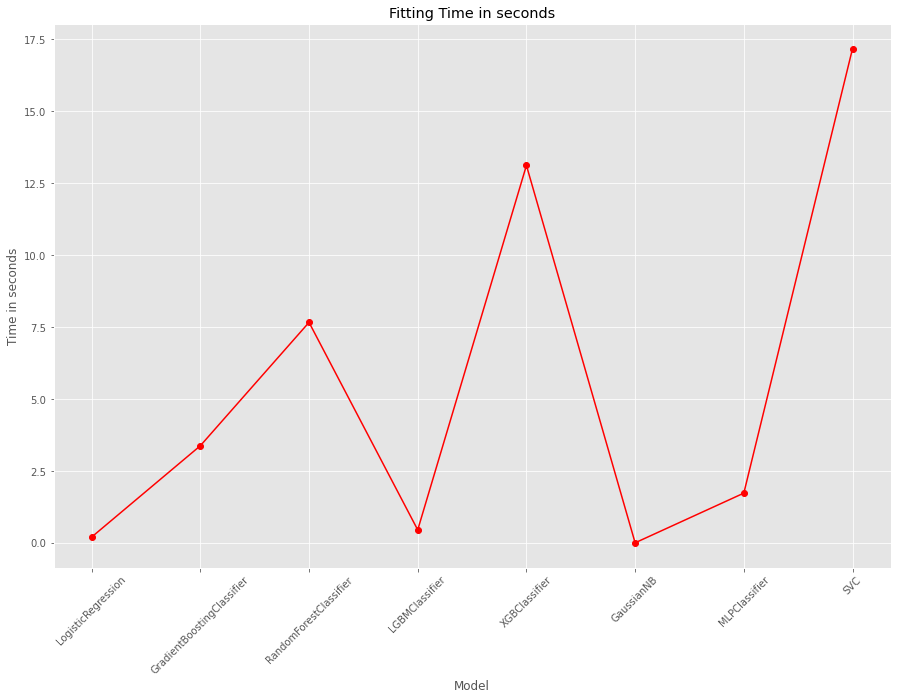

In [34]:
result_line(time_dict)

# Feature Importance

In [35]:
def plot_importance_features(models, X, y):
    
    fig, axes = plt.subplots(2, len(models) // 2, figsize=(23, 12))

    for ax, model in zip(axes.flatten(), models):
        try:
            model.fit(X, y)
            importance_features = pd.DataFrame(sorted(
                zip(model.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            importance_features = importance_features.sort_values('Value', ascending=False)
            sns.barplot(y="Feature", x="Value", ax=ax,
                        data=importance_features)
            current_model_name = model.__class__.__name__
            ax.set(title=f'{current_model_name} Feature Importances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=11))
        except:
            pass

[23:18:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


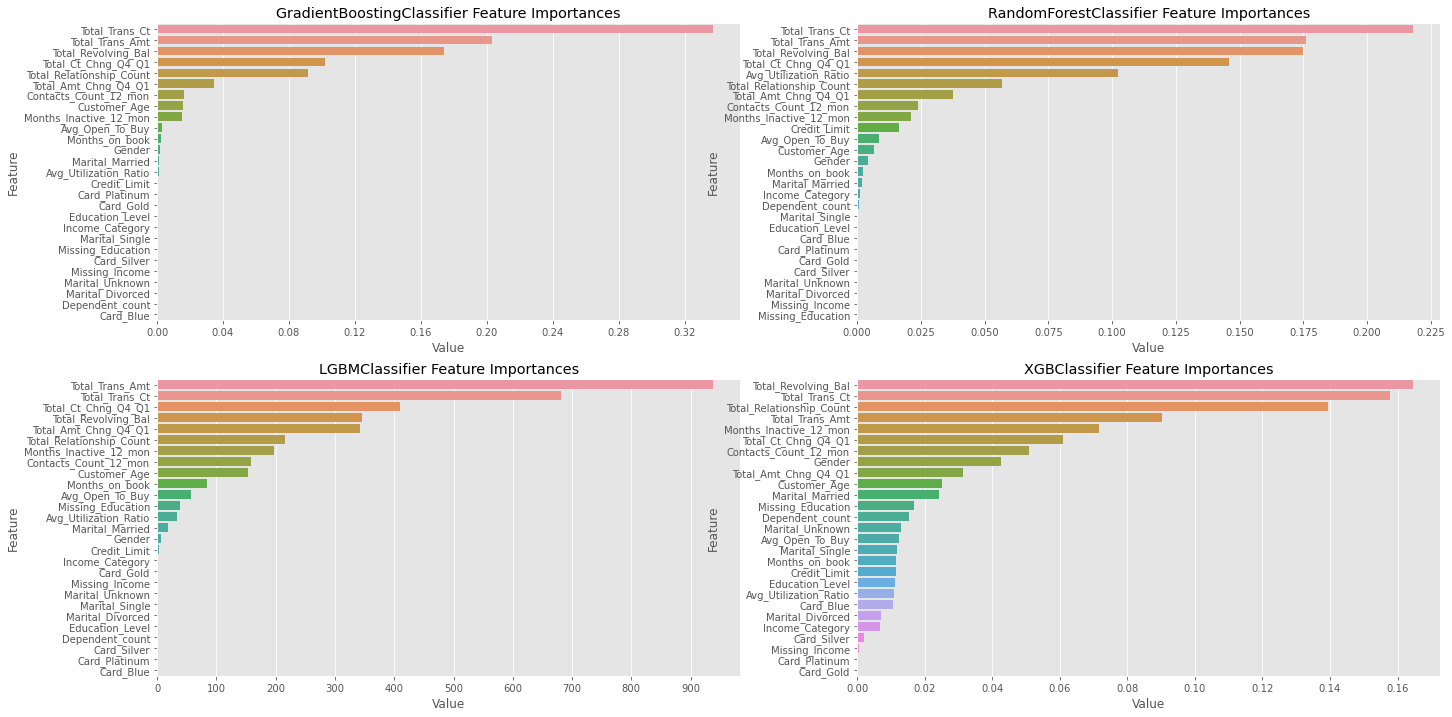

In [36]:
# some estimators don't have feature_importance that's why i choosed the estimators which are include feature_importance
plot_importance_features(models[1:5], X, y)

### Dimensional Reduction & Fit models again

Maybe some features are decreasing our models' accuracy. We try to reduce dimension then check accuracy again. Also, we try to improve models' accuracy using StandartScaler

In [37]:
# creates pipeline
my_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2)),
])

X_red = my_pipe.fit_transform(X)

**Fit again**

In [38]:
train_acc_dict_red, test_acc_dict_red, time_dict_red = estimates(X_red, y, models, cv)

[23:20:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

### Print & Plot the models' accuracy again.

In [39]:
# Training accuracy
for key, value in train_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.9%
GradientBoostingClassifier - 84.8%
RandomForestClassifier - 83.9%
LGBMClassifier - 84.1%
XGBClassifier - 90.4%
GaussianNB - 83.9%
MLPClassifier - 83.9%
SVC - 83.9%


In [40]:
# Test accuracy
for key, value in test_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.9%
GradientBoostingClassifier - 83.9%
RandomForestClassifier - 83.9%
LGBMClassifier - 83.9%
XGBClassifier - 82.0%
GaussianNB - 83.9%
MLPClassifier - 83.9%
SVC - 83.9%


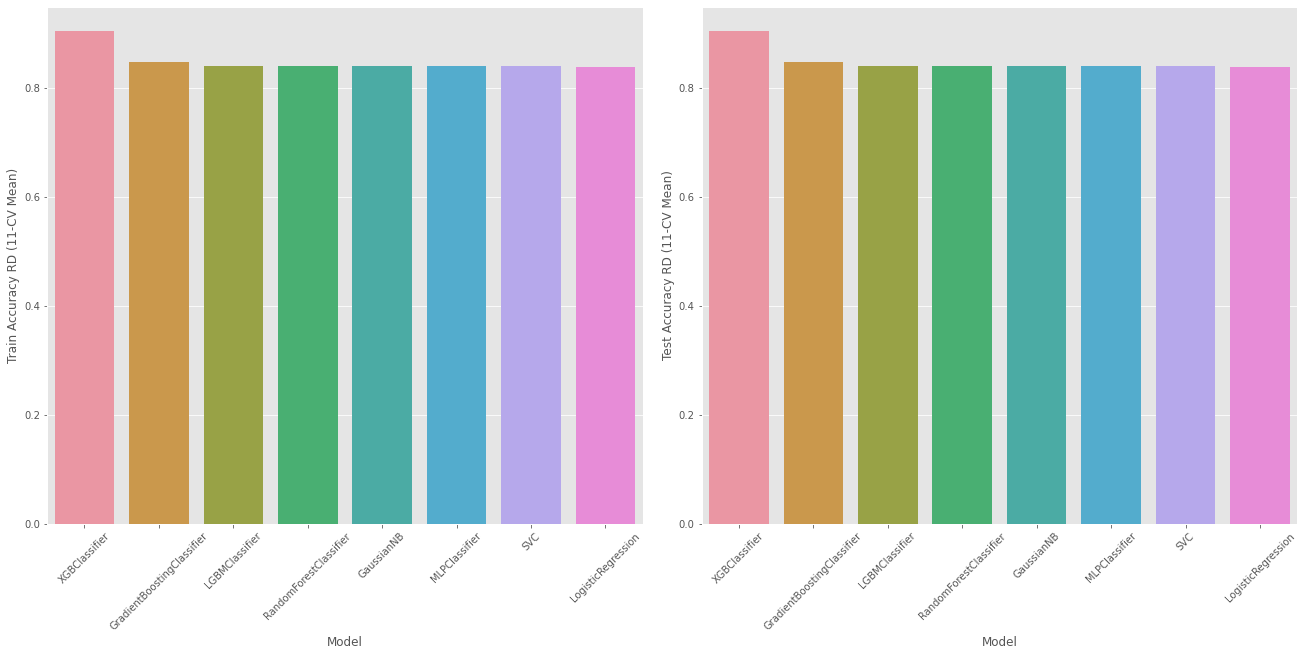

In [41]:
# plot bar plot
result_barplots(train_acc_dict_red, test_acc_dict_red, 'Train Accuracy RD (11-CV Mean)', 'Test Accuracy RD (11-CV Mean)')

In [42]:
# Fitting time
for key, value in time_dict.items():
    print('{} - {:.1f} seconds'.format(key, value))

LogisticRegression - 0.2 seconds
GradientBoostingClassifier - 3.4 seconds
RandomForestClassifier - 7.7 seconds
LGBMClassifier - 0.5 seconds
XGBClassifier - 13.1 seconds
GaussianNB - 0.0 seconds
MLPClassifier - 1.7 seconds
SVC - 17.2 seconds


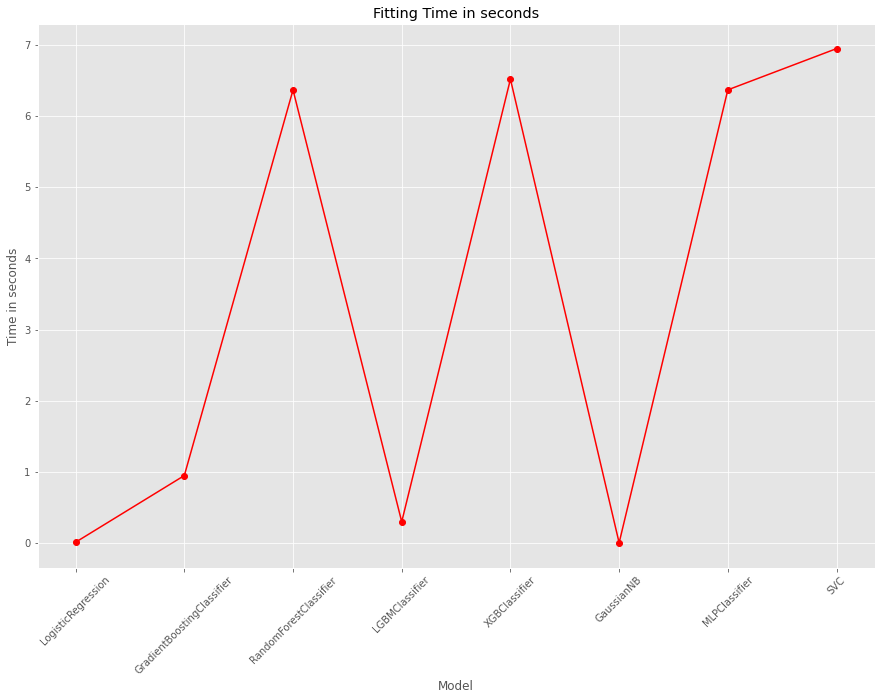

In [43]:
# plot line
result_line(time_dict_red)